# Lorentz attractor Model

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
import pysindy as ps

### Define Lorentz system to produce training data:

Define system constants:

In [2]:
sigma = 10
rho = 10
beta = 10

Define system DEs as function:

In [3]:
def lorenz(t, x):
    return [
        sigma*(x[1] - x[0]),
        x[0]*(rho - x[2]) - x[1],
        x[0]*x[1] - beta*x[2]
    ]

### Create training data (2 Seperate Trajectories)

In [4]:
dt = 0.0001  # Timestep

# First trajectory:
t_train1 = np.arange(0,10,dt)  # Time range to integrate over
x0_train1 = [-1,1,-1]  # Initial conditions
sol1 = solve_ivp(lorenz, (t_train1[0], t_train1[-1]), x0_train1, t_eval=t_train1)  # Integrate to produce x(t),y(t),z(t)
x_train1 = np.transpose(sol1.y)  
print(x_train1)

# Second trajectory:
t_train2 = np.arange(100,110,dt)  # Time range to integrate over
x0_train2 = [2,-2,2]  # Initial conditions
sol2 = solve_ivp(lorenz, (t_train2[0], t_train2[-1]), x0_train2, t_eval=t_train2) # Integrate to produce x(t),y(t),z(t)
x_train2 = np.transpose(sol2.y)  

# Add noise to both our trajectories:
x_train1 += np.random.normal(scale = 0.05, size=x_train1.shape) 
x_train2 += np.random.normal(scale = 0.05, size=x_train2.shape) 

# Combine both trajectory data sets into a list:
x_train = [x_train1, x_train2]

[[-8.          8.         27.        ]
 [-7.98400166  8.01277236 26.96661815]
 [-7.96800665  8.02548953 26.93327263]
 ...
 [ 9.47977286  9.49063538  9.00494393]
 [ 9.47978371  9.49062961  9.0049359 ]
 [ 9.47979455  9.49062385  9.00492788]]


### Create our SINDy model:

In [5]:
stlsq_opt = ps.STLSQ(threshold = 0.1) # Set threshold
model = ps.SINDy(optimizer=stlsq_opt)
model.fit(x_train, t=dt, multiple_trajectories=True)
model.print()

x0' = 2.775 1 + -12.201 x0 + 12.332 x1 + -1.092 x2 + 0.789 x0^2 + -1.043 x0 x1 + 0.236 x0 x2 + 0.422 x1^2 + -0.251 x1 x2 + -0.100 x2^2
x1' = -0.266 1 + 8.459 x0 + -0.721 x1 + -0.873 x2 + -0.468 x0^2 + 0.642 x0 x1 + -0.860 x0 x2 + -0.262 x1^2 + 0.198 x2^2
x2' = -1.380 1 + 1.372 x0 + -0.712 x1 + -7.469 x2 + 0.577 x0 x1 + 0.227 x0 x2 + 0.186 x1^2 + -0.301 x1 x2


In [6]:
# Evolve the Lorenz equations in time using a different initial condition
t_test = np.arange(0, 15, dt)  # Longer time range
x0_test = np.array([8, 7, 15])  # New initial conditions
sol = solve_ivp(lorenz, (t_test[0], t_test[-1]), x0_test, t_eval=t_test) # Integrate to produce x(t),y(t),z(t)
x_test = np.transpose(sol.y)  

# Compare SINDy-predicted derivatives with finite difference derivatives
print('Model score: %f' % model.score(x_test, t=dt))

Model score: 0.872835


[Text(0.5, 0, '$x_0$'),
 Text(0.5, 0, '$x_1$'),
 Text(0.5, 0, '$x_2$'),
 Text(0.5, 0.92, 'model simulation')]

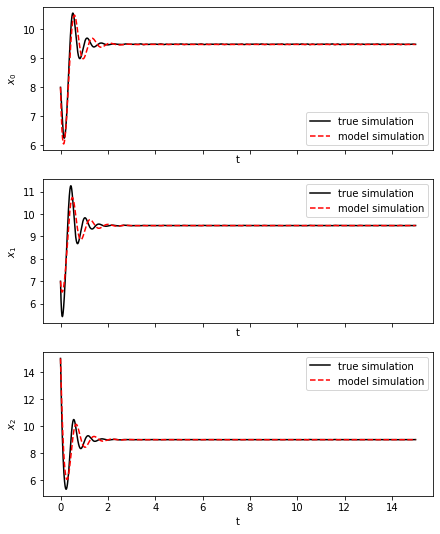

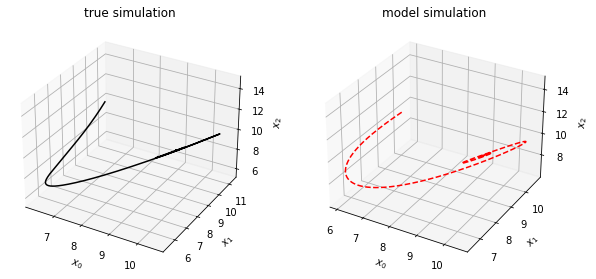

In [7]:
x_test_sim = model.simulate(x0_test, t_test)
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7,9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='true simulation')
    axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i))
    #plt.xlim([290,300])
    
fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], 'k')
ax1.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='true simulation')


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], 'r--')
ax2.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='model simulation')
